# Ejercicios clase 2: Stochastic Gradient Descent

## Ejercicio 1: SGD para encontrar el mínimo de una función
Se implenta en Python un algoritmo basado en SGD para encontrar numéricamente el mínimo de la función,

$$ y = -(x - 2)^2 -3 $$

Se trata de un polinomio de segundo grado que puede reescribir como,

$$ y = -x^2 + 4x -1 $$

Se pretende encontrar el máximo valor encontrado por el algoritmo y para qué valor de x, cómo así también en qué momento se detuvo el proceso. 

El algoritmo de minimización _gradient descent_ consiste en actualizar cada valor de $x$ mediante el algoritmo,

$$ x_{t+1} = x_t - \alpha \nabla_{y}(x) $$

siendo $\alpha$ el valor de _learning rate_. Este debe ser chico para que los pasos sean pequeños y evaluar el gradiente en entornos alrededor del punto en estudio. El proceso termina cuando $dy/dx \thickapprox0$.

La cuestión es decidir el punto inicial de evaluación. Se generan valores valores random de valores iniciales $x_0$ y se observa el mejor resultado. De esta forma, los hiperparámetros son:

- El punto inicial $x_0$
- El valor del learning rate.

## Librerías necesarias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import decimal

Se define la función para hallar el valor de $x$ que hace mínimo a $y$ empleando SGD

In [2]:
def x_min_sgd(x_0, lr, epochs):
    '''
    x_0: valor inicial de x
    lr: learning rate
    epochs: número máximo de iteraciones
    '''
    i = 1
    i_min = 0
    x = x_0
    for i in range(epochs):
        dydx = -2*x + 4
        if dydx == 0.001:
            x_min = x
            i_min = i 
            break
        x = x - lr*dydx
        i += 1

    if i_min!=0:
        print(f'Se obtuvo el mínimo en x = {x_min:.2f} con x_0 = {x_0:.2f} en la iteración {i_min}')
        return x_min, i_min
    else:
        print(f'El valor obtenido en x = {x:.2f} con x_0 = {x_0:.2f} corresponde al máximo de iteraciones {i}')
        return x, i

In [3]:
#Valores iniciales de prueba, random con distribución uniforme
rng = np.random.default_rng(32)
x_0 = rng.uniform(-1,5,10)
#Learning rate
lr = 0.001
#Iteraciones
iterations = 1000

In [4]:
result = []
for i in range(len(x_0)):
    result.append(x_min_sgd(x_0[i], lr, iterations))

El valor obtenido en x = -13.03 con x_0 = -0.04 corresponde al máximo de iteraciones 1000
El valor obtenido en x = 5.20 con x_0 = 2.43 corresponde al máximo de iteraciones 1000
El valor obtenido en x = -3.44 con x_0 = 1.26 corresponde al máximo de iteraciones 1000
El valor obtenido en x = -5.83 con x_0 = 0.94 corresponde al máximo de iteraciones 1000
El valor obtenido en x = 10.26 con x_0 = 3.12 corresponde al máximo de iteraciones 1000
El valor obtenido en x = 22.89 con x_0 = 4.83 corresponde al máximo de iteraciones 1000
El valor obtenido en x = 22.66 con x_0 = 4.80 corresponde al máximo de iteraciones 1000
El valor obtenido en x = 9.58 con x_0 = 3.03 corresponde al máximo de iteraciones 1000
El valor obtenido en x = 16.61 con x_0 = 3.98 corresponde al máximo de iteraciones 1000
El valor obtenido en x = 0.22 con x_0 = 1.76 corresponde al máximo de iteraciones 1000


En todos los casos evaluados, ocurre que no se encuentra un mínimo. Eso pasa porque la función evaluada no tiene mínimos locales y el mínimo global se encuentra en el infinito. Se muestra en la siguiente gráfica

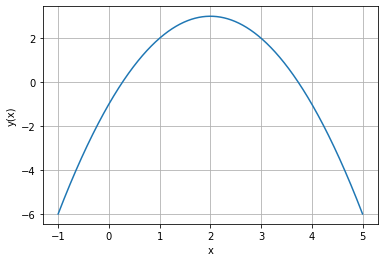

In [5]:
X_1 = np.linspace(-1, 5, 10000)
y_1 = -X_1**2 + 4*X_1 -1
plt.plot(X_1,y_1)
plt.xlabel('x')
plt.ylabel('y(x)')
plt.grid(True)

## Ejercicio 2: Mini-Batch Gradient Descent
Se tiene datos que responden a la función,
$$ y = -(x-2)^2 + 3 + 0.2\sin(16x) $$

Se pretende encontrar  un polinomio predictor de segundo grado, cuyos parámetros iniciales son elegidos al azar,

$$ \hat{y} = x^2w_1 + xw_2 + w_3 $$

En principio, cada parámetro se ajusta para cada muestra $i$ aplicando el algoritmo,

$$ w_{i+1} = w_i - \alpha \frac{dL_i}{dw_i} $$

siendo $L_i$ la función de pérdida en cada epochs, 

$$ L_i = (y_i - \hat{y}_i)^2 $$

Sin embargo, el método _mini-batch_ consiste en estimar cada parámetro ya no muestra por muestra sino por paquetes de muestras (se ve en detalle en los algortimos). Por lo que la función de pérdida será error cuadrático medio (_mean square error_) sobre cada batch de datos, 

$$ L_{b} = \frac{1}{b}\sum_{i=1}^{b}(y_i - \hat{y})^2 $$

siendo b la cantidad de muestras en un batch. A partir de esta última ecuación, cada parámetro o peso se calcula como,

$$ w_{1_{i+1}} = w_{1_i} - \left( \frac{-2}{b} \right) \sum_{i=1}^{b} x_i^2 (y_i - \hat{y}_i) $$

$$ w_{2_{i+1}} = w_{2_i} - \left( \frac{-2}{b} \right) \sum_{i=1}^{b} x_i (y_i - \hat{y}_i) $$

$$ w_{3_{i+1}} = w_{3_i} - \left( \frac{-2}{b} \right) \sum_{i=1}^{b} (y_i - \hat{y}_i) $$

Finalmente, al finalizar la actualización de parámetros en cada mini-batch, se calcula el error cuadrático medio (_mean square error_) sobre el total de muestras $n$,

$$ MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y})^2 $$

### Hiperparámetros del optimizador
POr lo presentado, los hiperarámetros del optimizador son:
- El learning rate $\alpha$.
- La cantidad de epochs.
- El tamaño de cada batch (_batch size_).

### Construcción de dataset y funciones
A continuación se comienza con la resolución del problema. Se arma un dataset sintético con 10000 muestras.

In [6]:
# Número de muestras
n = 10000
X_2 = np.linspace(-1,5,n).reshape(-1,1)
y_2 = -(X_2-2)**2 + 3 + 0.2*np.sin(16*X_2).reshape(-1,1)
y_3 = -X_2**2 + 4*X_2 -1

Se muestra el gráfico de la función para visualizar que se busca predecir con el polinomio de segundo grado

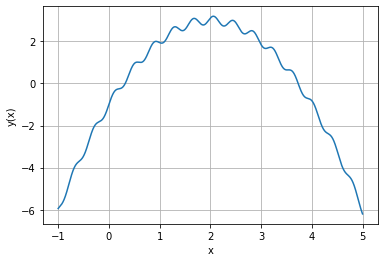

In [7]:
plt.plot(X_2,y_2)
plt.xlabel('x')
plt.ylabel('y(x)')
plt.grid(True)

La función _sgd_mb_ realiza el cálculo de los pesos, de acuerdo a lo mostrado en la introducción teórica

In [8]:
def sgd_mb(X_train, y_train, W_0, lr, epochs, bs):
    """
    shapes:
        X_train = dataset (nxm)
        y_train = label (nx1)
        W_0 = vector de valores de parámetros iniciales (mx1)
        lr: learning rate
        epochs
        b: batches
    """
    # Cantidad total de muestras
    n = X_train.shape[0]
    
    # Inicialización de los pesos
    W = W_0
    

    # Inicialización del acumulador del cálculo del error cuádratico medio
    MSE = []

    
    # Iteraciones según epochs
    for i in range(epochs):        
        
        # Permutación de los datos
        idx = np.random.permutation(X_train.shape[0])
        X_train = X_train[idx]
        y_train = y_train[idx]
        
        # Calculo del "batch size" de datos en función del número de "batches"
        batch_size = int(len(X_train)/b)
        
        # Iteraciones sobre cada batch de datos
        for j in range(0, len(X_train), batch_size):
            end = j + batch_size if j + batch_size <= len(X_train) else len(X_train)
            batch_X = X_train[j:end] # batch_size x m
            batch_y = y_train[j:end].reshape(-1,1) # batch_size x 1
            
            # Cálculo de la predicción por cada batch
            batch_pred = np.matmul(batch_X,W)
            #Cálculo del error para todo el batch
            Err = batch_y - batch_pred
            
            # Cálculo del gradiente para todo el batch
            # La matriz batch_x ya tiene calculados los valores de x según ecuaciones mostradas
            grad_sum = np.sum(Err*batch_X, axis=0) #1xm
            grad_mul = -2/batch_size * grad_sum #1xm
            gradient = grad_mul.reshape(-1,1)
            
            # Actualización de los pesos
            W = W - lr*gradient
            
        # Cálculo del error cuadrático medio al terminar cada epock    
        y_pred = np.matmul(X_train,W)
        MSE.append(np.sum((y_train - y_pred) ** 2) / n)
   
    return MSE

### Parámetros iniciales

Se arma una matriz a partir de las muestras de $X_2$ para operar de forma vectorizada con los parámetros del polinomio. Cada columna se corresponde con un parámetro $w$

In [9]:
# Primer columna para w_1
X_2p = (X_2[:,0]**2).reshape(-1,1)
#Segunda columna para w_2
X_2p = np.hstack((X_2p, X_2))
#Tercer columna: se completa con 1 para w_3
X_2p = np.hstack((X_2p, np.ones(len(X_2p)).reshape(-1,1)))
X_2p[:,2]

array([1., 1., 1., ..., 1., 1., 1.])

Los valores iniciales de los pesos se toman de forma aleatoria, según una distribución uniforme.  

In [10]:
# Cantidad de feature
m = X_2p.shape[1]

np.random.seed(5) 
W_0 = np.random.rand(m).reshape(-1,1) #mx1
np.matmul(X_2p,W_0).shape

(10000, 1)

## Resultados
Se realizan dos evaluaciones
- Tomando diferentes valores de _epochs_
- Tomando diferentes valores de _batch size_ 
En ambos casos, se grafica la convergencia a partir de los cálculos de MSE. Se toma un valor fijo de $\alpha=0.001$

### Variación de epochs

Text(0, 0.5, 'MSE')

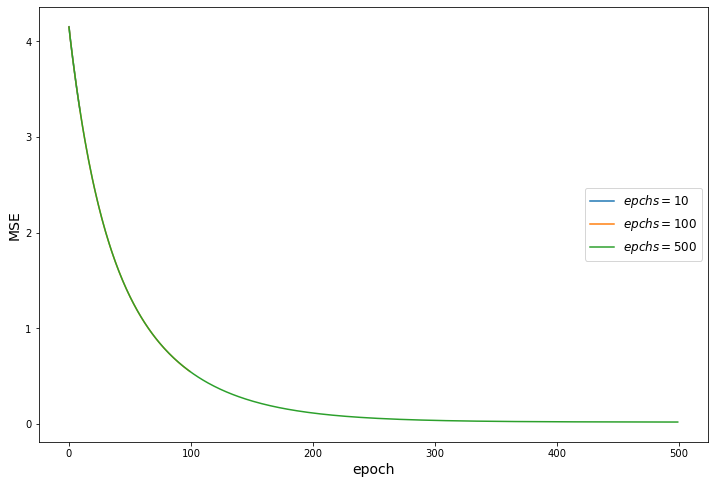

In [11]:
# Learning rate
alpha = 0.001
# Epochs
epochs = [10, 100, 500]
# cantidad de batches
b = 16
eje_x = np.linspace(0,2000,2000)
ax = plt.figure(figsize=(12,8))

for k in range(len(epochs)):
    epoch = epochs[k]
    MSE = sgd_mb(X_2p, y_2, W_0, alpha, epoch, b)
    plt.plot(MSE, label=r'$epchs=${}'.format(epoch))
    plt.legend( fontsize=12, loc='center right')

plt.xlabel('epoch', fontsize=14)
plt.ylabel('MSE', fontsize=14)

### Variación de cantidad de batch

Text(0, 0.5, 'MSE')

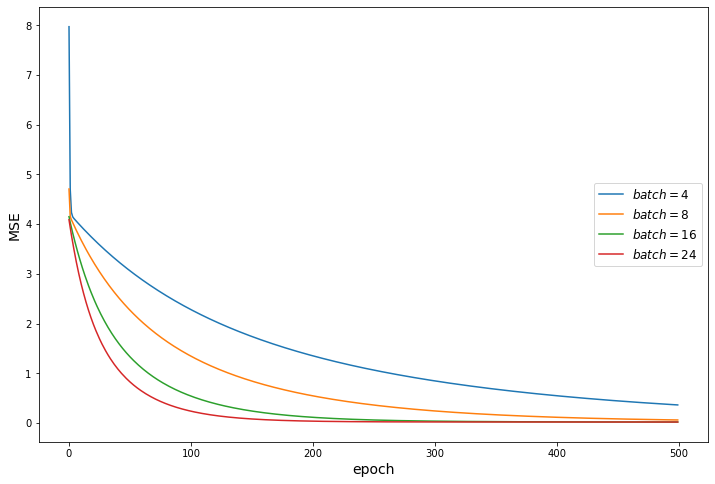

In [12]:
# Epochs
epochs = 500
# Cantidad de batches
bs = [4, 8, 16, 24]
eje_x = np.linspace(0,2000,2000)
ax = plt.figure(figsize=(12,8))

for k in range(len(bs)):
    b = bs[k]
    MSE = sgd_mb(X_2p, y_2, W_0, alpha, epoch, b)
    plt.plot(MSE, label=r'$batch=${}'.format(b))
    plt.legend( fontsize=12, loc='center right')

plt.xlabel('epoch', fontsize=14)
plt.ylabel('MSE', fontsize=14)

## Conclusiones
La variación de epochs no produce cambios. Se conserva la tendencia de convergencia a medida que se incrementa la cantidad de iteraciones. 
En cuanto a la variación de la cantidad de batches, a medida que se incrementa su valor, se acelera la convergencia. 